# Small Worlds Project

### Alunos:


*   Lyndon Jonhson Cabral Filho
*   Rafael Pinheiro Carlos Maia



Neste projeto, trabalharemos com um conjunto de dados da malha aérea brasileira, que pode ser encontrada no link abaixo:
https://github.com/alvarofpp/dataset-flights-brazil

## Importando Bibliotecas

In [ ]:
!pip install nxviz=='0.6.3'
!pip install seaborn=='0.11.1'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import nxviz as nv
import seaborn as sns
import pandas as pd

## Instanciando o graphml

In [ ]:
!wget --no-check-certificate "https://raw.githubusercontent.com/alvarofpp/dataset-flights-brazil/main/data/air_traffic.graphml"

--2023-06-02 20:58:12--  https://raw.githubusercontent.com/alvarofpp/dataset-flights-brazil/main/data/air_traffic.graphml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 999079 (976K) [text/plain]
Saving to: ‘air_traffic.graphml.1’

air_traffic.graphml 100%[===================>] 975.66K  --.-KB/s    in 0.02s   

2023-06-02 20:58:12 (49.6 MB/s) - ‘air_traffic.graphml.1’ saved [999079/999079]



In [ ]:
G = nx.read_graphml('./air_traffic.graphml')

## Filtrando dados para o Brasil

Atualmente, temos abaixo seguinte quantidade de nós e links com dados de diversos países.

In [ ]:
print("Número de nós:", G.number_of_nodes())
print("Número de links:", G.number_of_edges())

Número de nós: 1083
Número de links: 9613


In [ ]:
for node in G.nodes(data=True):
  print(node)

('KDFW', {'name': 'DALLAS & FORT WORTH, TEXAS', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': '32.896801', 'longitude': '-97.038002'})
('KJFK', {'name': 'NEW YORK, NEW YORK', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': '40.639801', 'longitude': '-73.7789'})
('KMIA', {'name': 'MIAMI, FLORIDA', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': '25.79319953918457', 'longitude': '-80.29060363769531'})
('SBCF', {'name': 'CONFINS', 'country': 'BRASIL', 'latitude': '-19.62444305419922', 'longitude': '-43.97194290161133'})
('SBGL', {'name': 'RIO DE JANEIRO', 'country': 'BRASIL', 'latitude': '-22.8099994659', 'longitude': '-43.2505569458'})
('SBGR', {'name': 'GUARULHOS', 'country': 'BRASIL', 'latitude': '-23.435556411743164', 'longitude': '-46.47305679321289'})
('SGAS', {'name': 'ASUNCIÓN', 'country': 'PARAGUAI', 'latitude': '-25.239999771118164', 'longitude': '-57.52000045776367'})
('SSUM', {'name': 'UMUARAMA', 'country': 'BRASIL', 'latitude': '-23.7987003326416', 'longitude': 

Filtrando os dados para o país Brasil.

In [ ]:
br_nodes_list = []
for node in G.nodes(data=True):
  if node[1]['country'] == 'BRASIL':
    br_nodes_list.append(node[0])

G_br = G.subgraph(br_nodes_list)

Após filtrar os dados pelo país, temos agora a seguinte quantidade de nós e links.

In [ ]:
print("Número de nós:", G_br.number_of_nodes())
print("Número de links:", G_br.number_of_edges())

Número de nós: 495
Número de links: 4402


In [ ]:
for node in G_br.nodes(data=True):
  print(node)

('SJLM', {'name': 'PACARAIMA', 'country': 'BRASIL', 'latitude': '4.151669979095459', 'longitude': '-61.427799224853516'})
('SWKK', {'name': 'CACOAL', 'country': 'BRASIL', 'latitude': '-11.43', 'longitude': '-61.48'})
('SNHS', {'name': 'SERRA TALHADA', 'country': 'BRASIL', 'latitude': '-8.0623998642', 'longitude': '-38.3288002014'})
('SBAF', {'name': 'RIO DE JANEIRO', 'country': 'BRASIL', 'latitude': '-22.875099', 'longitude': '-43.384701'})
('SWMK', {'name': 'SÃO GABRIEL DA CACHOEIRA', 'country': 'BRASIL', 'latitude': '0.6282690167427063', 'longitude': '-66.11509704589844'})
('SSBE', {'name': 'CAMAPUÃ', 'country': 'BRASIL', 'latitude': '-19.598400115966797', 'longitude': '-54.02109909057617'})
('SWBG', {'name': 'PONTES E LACERDA', 'country': 'BRASIL', 'latitude': '-15.1934', 'longitude': '-59.3848'})
('SBEK', {'name': 'JACAREACANGA', 'country': 'BRASIL', 'latitude': '-6.233160018920898', 'longitude': '-57.77690124511719'})
('SNGQ', {'name': 'RONDON DO PARÁ', 'country': 'BRASIL', 'latit

Contudo, está faltando o dado da região e estado, então vamos acrescentá-los.

In [ ]:
airports = pd.read_csv("https://raw.githubusercontent.com/alvarofpp/dataset-flights-brazil/main/data/airports.csv", index_col="code")

for node in G_br.nodes(data=True):
  node[1]["state"] = airports.loc[node[0], "state"]
  node[1]["region"] = airports.loc[node[0], "region"]

for node in G_br.nodes(data=True):
  print(node)

('SJLM', {'name': 'PACARAIMA', 'country': 'BRASIL', 'latitude': '4.151669979095459', 'longitude': '-61.427799224853516', 'state': 'RR', 'region': 'NORTE'})
('SWKK', {'name': 'CACOAL', 'country': 'BRASIL', 'latitude': '-11.43', 'longitude': '-61.48', 'state': 'RO', 'region': 'NORTE'})
('SNHS', {'name': 'SERRA TALHADA', 'country': 'BRASIL', 'latitude': '-8.0623998642', 'longitude': '-38.3288002014', 'state': 'PE', 'region': 'NORDESTE'})
('SBAF', {'name': 'RIO DE JANEIRO', 'country': 'BRASIL', 'latitude': '-22.875099', 'longitude': '-43.384701', 'state': 'RJ', 'region': 'SUDESTE'})
('SWMK', {'name': 'SÃO GABRIEL DA CACHOEIRA', 'country': 'BRASIL', 'latitude': '0.6282690167427063', 'longitude': '-66.11509704589844', 'state': 'AM', 'region': 'NORTE'})
('SSBE', {'name': 'CAMAPUÃ', 'country': 'BRASIL', 'latitude': '-19.598400115966797', 'longitude': '-54.02109909057617', 'state': 'MS', 'region': 'CENTRO-OESTE'})
('SWBG', {'name': 'PONTES E LACERDA', 'country': 'BRASIL', 'latitude': '-15.1934'

## 1. Assortatividade

Na área de grafos e ciência das redes, **assortatividade** é uma métrica utilizada para quantificar a tendência de nós individuais se conectarem a outros nós semelhantes um grafo. Além disso, é capaz de definir o comportamento dinâmico de uma rede, bem como a sua robustez, analisando o seu grau de assortatividade.


* r > 0: **assortativo**, isto é, os nós tendem a se conectar a outros com características semelhantes;
* r ≅ 0: **aleatório**, isto é, os nós tendem a se conectar a outros de maneira aleatória;
* r < 0: **dissortativo**, isto é, os nós tendem a se conectar a outros com características diferentes.

Vamos agora obter o coeficiente **r**.



In [ ]:
print("r:", nx.attribute_assortativity_coefficient(G_br, "region"))

r: 0.36728130173582757


Dado o nosso **r**, a rede das regiões é categorizada como **assortativa**, mas como ela não é muito maior que 0, isso indica uma tendência dos nós se conectarem aos outros de maneira aleatória.

Vamos agora gerar o gráfico de assortatividade.

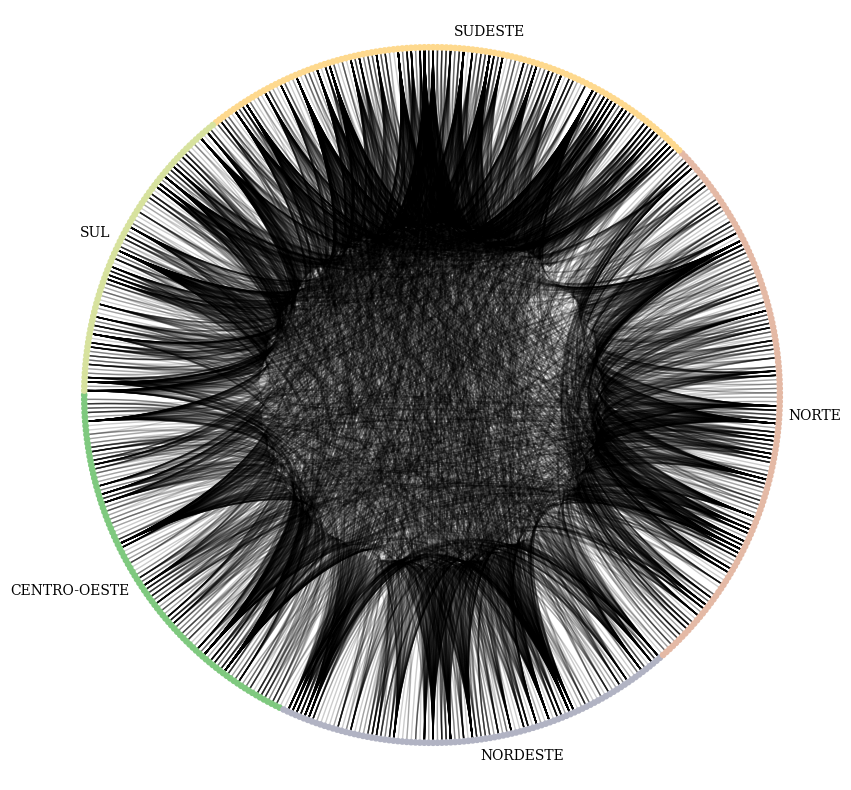

In [ ]:
c = nv.CircosPlot(G_br,
                  node_color="region",
                  node_grouping="region",
                  node_order="region",
                  group_order="alphabetically",
                  group_legend=False,
                  node_labels=False,
                  group_label_position="middle",
                  group_label_color=False,figsize=(10,10))

c.draw()

plt.savefig("assortatividade.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.show()

## 2. Análise bivariada entre o grau do vértice e o número médio de vizinhos

A análise bivariada é uma das formas mais simples de análise quantitativa. Envolve a análise de duas variáveis, com o objetivo de determinar a relação empírica entre elas. A análise bivariada pode ser útil para testar hipóteses simples de associação.

Vamos agora criar uma função que irá pegar os dados para realizar a análise bivariada para o país e para cada região.

In [ ]:
def bivariateAnalysisByRegion(G_br, region):
  if region != None:
    nodes_list = []
    for node in G_br.nodes(data=True):
      if node[1]['region'] == region:
        nodes_list.append(node[0])
    G_temp = G_br.subgraph(nodes_list)
  else:
    G_temp = G_br

  degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G_temp).items())
  degree_assortativity_coef = nx.degree_assortativity_coefficient(G_temp)

  degree = list(degree)
  avg_neigh_degree = list(avg_neigh_degree)

  plt.style.use("fivethirtyeight")
  fig, ax = plt.subplots(1, 1, figsize=(12, 8))
  
  sns.regplot(degree, avg_neigh_degree, ax=ax)

  ax.set_xlabel("Node Degree")
  ax.set_ylabel("Average neighbor degree")

  plt.savefig(region+"_grau_assortatividade.png" if region != None else "brasil_grau_assortatividade.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)
  
  plt.title("Brasil" if region == None else region)

  plt.show()

  print("coeficiente de assortatividade:", degree_assortativity_coef)

Ao analisar os gráficos e os coeficientes obtidos logo abaixo, verificamos que todos os coeficientes foram negativos, o que mostra que os nós de cada rede tendem a se conectar com nós de graus diferentes.

### Brasil

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


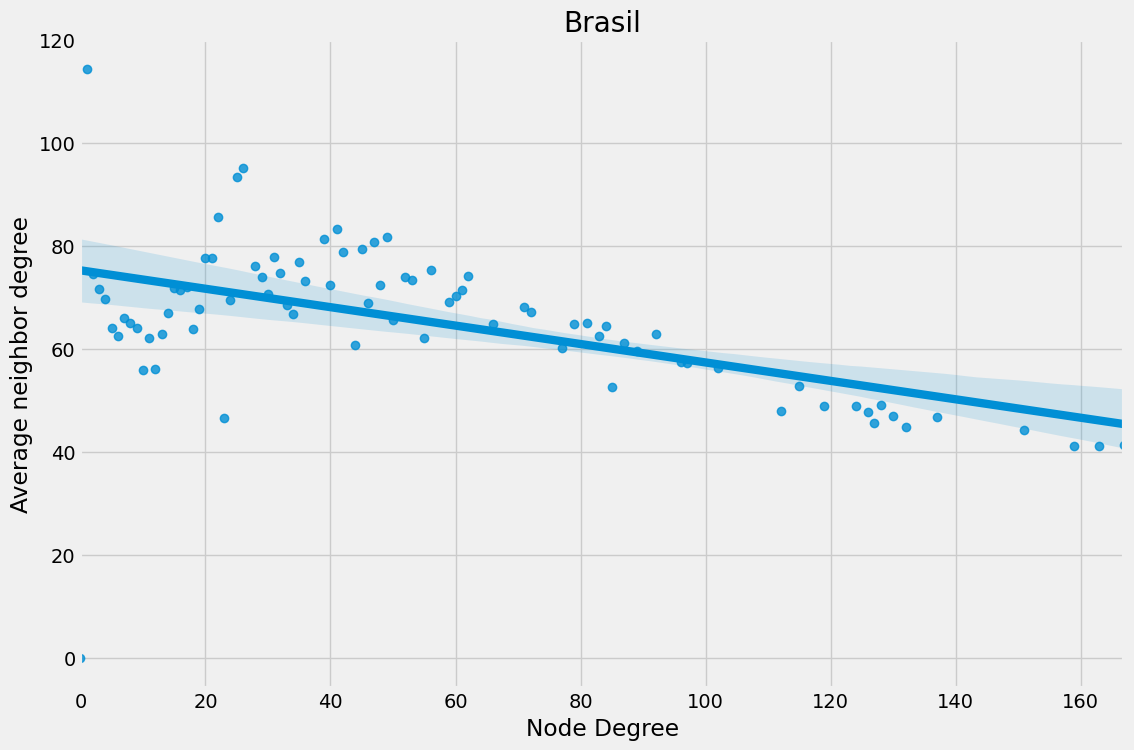

coeficiente de assortatividade: -0.2017097172979742


In [ ]:
bivariateAnalysisByRegion(G_br, None)

### Regiões

#### Norte

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


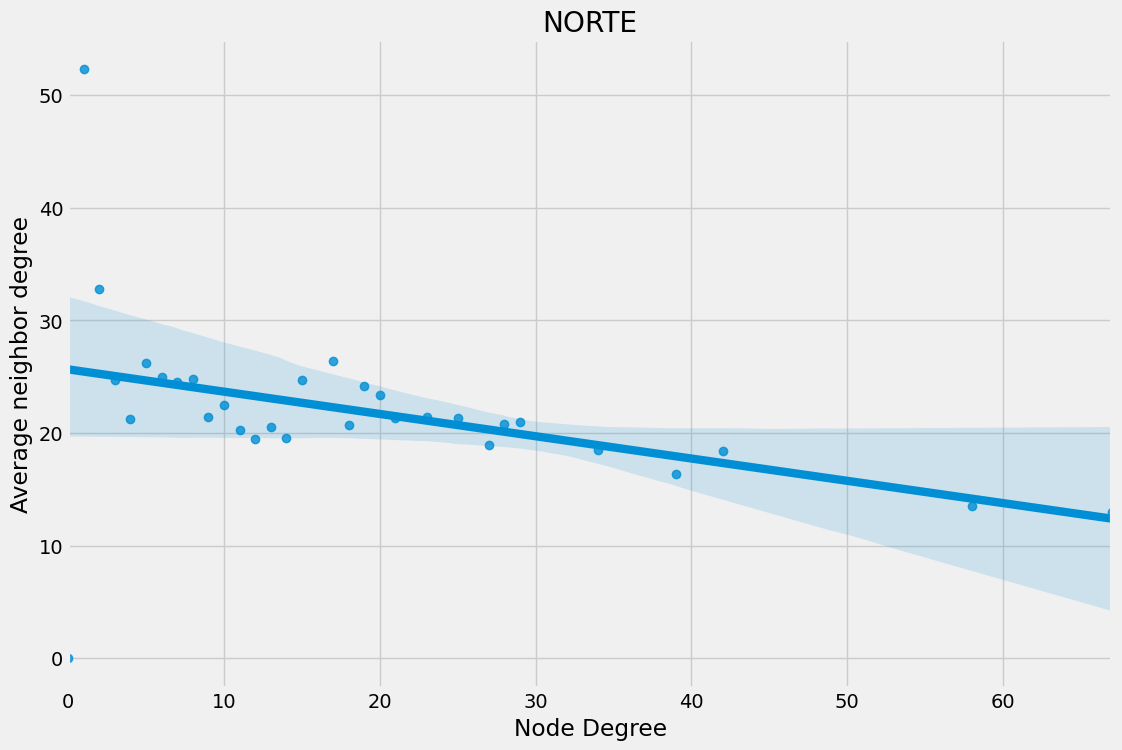

coeficiente de assortatividade: -0.22193985877089423


In [ ]:
bivariateAnalysisByRegion(G_br, 'NORTE')

#### Nordeste

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


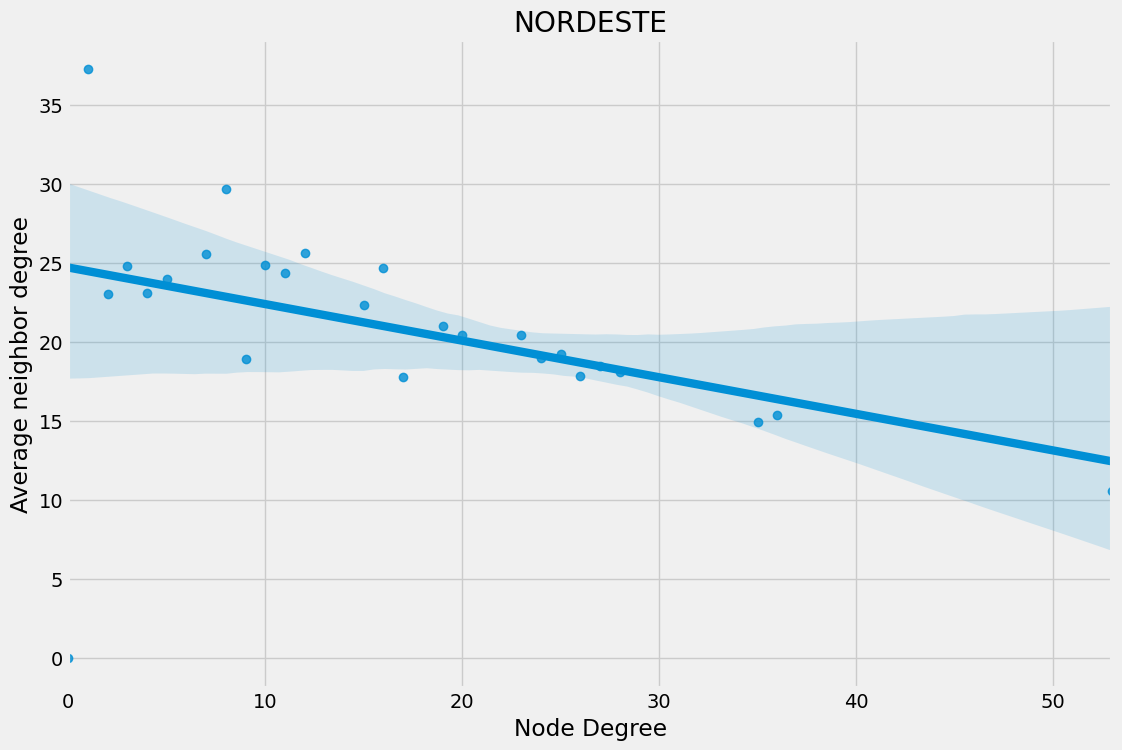

coeficiente de assortatividade: -0.33375735918340366


In [ ]:
bivariateAnalysisByRegion(G_br, 'NORDESTE')

#### Sul

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


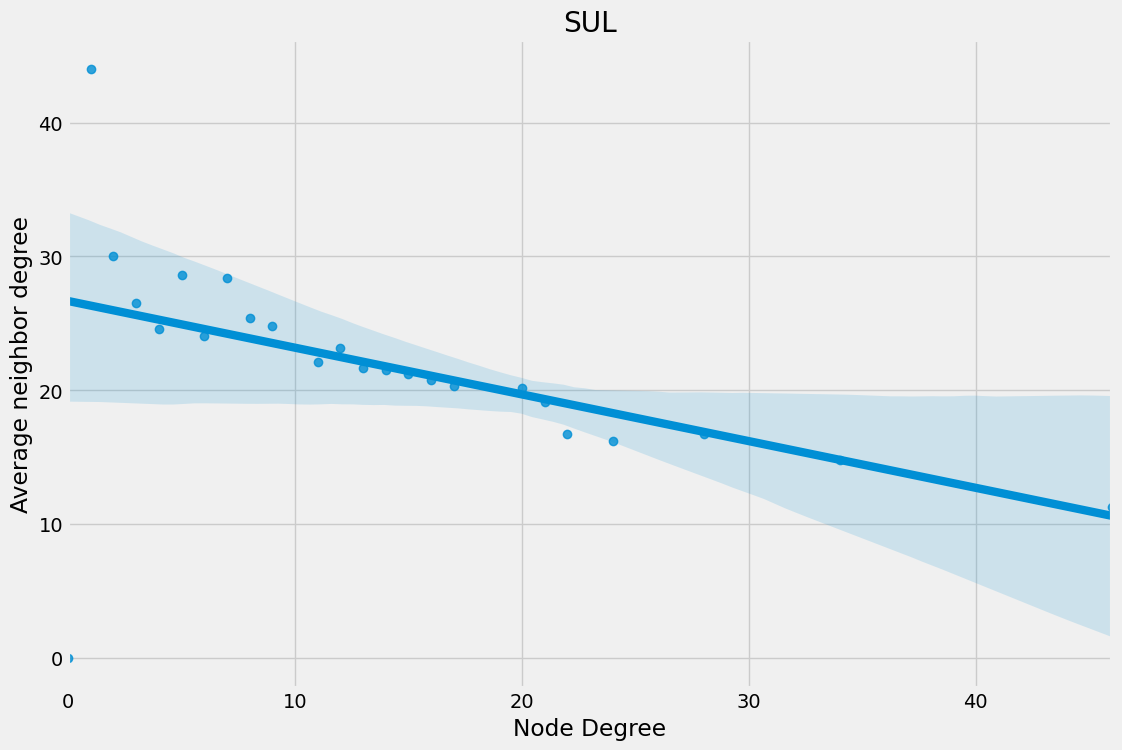

coeficiente de assortatividade: -0.40181381306857755


In [ ]:
bivariateAnalysisByRegion(G_br, 'SUL')

#### Sudeste

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


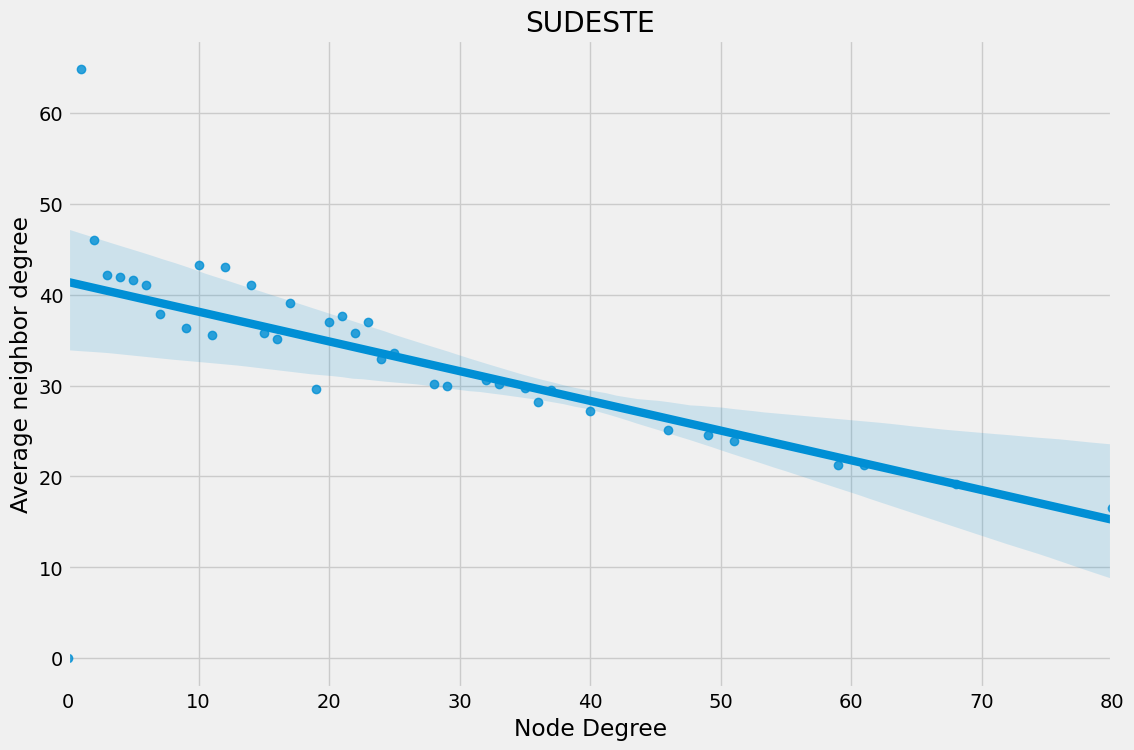

coeficiente de assortatividade: -0.3687746079424212


In [ ]:
bivariateAnalysisByRegion(G_br, 'SUDESTE')

#### Centro-oeste

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


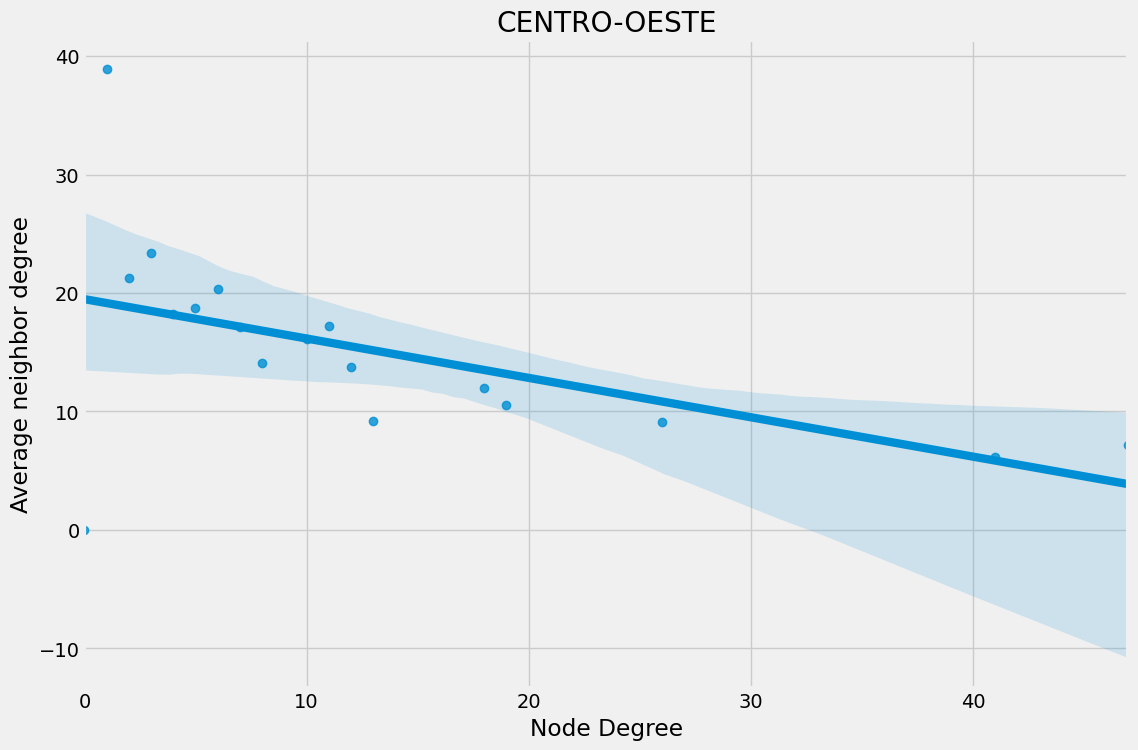

coeficiente de assortatividade: -0.3542839902086467


In [ ]:
bivariateAnalysisByRegion(G_br, 'CENTRO-OESTE')

## 3. Componentes conectados

Neste tópico vamos determinar quantos componentes conectados existem na rede aérea brasileira. Caracterizando a quantidade a porcentagem por região.

Vamos agora criar uma função para verificar isso.

In [ ]:
def connectedComponentsByRegion(G_br, region):
  if (region == None):
    print('Número de componentes conectados:', nx.number_connected_components(G_br))
    return

  G_cg = G_br.subgraph(list(nx.connected_components(G_br))[0])

  nodes_list = []
  for node in G_cg.nodes(data=True):
    if node[1]['region'] == region:
      nodes_list.append(node[0])

  G_temp = G_cg.subgraph(nodes_list)

  print('Número de componentes conectados:', nx.number_connected_components(G_temp))
  print('Porcentagem: %0.2f' % (len(nodes_list)/G_cg.number_of_nodes()*100) + '%')

### Brasil

In [ ]:
connectedComponentsByRegion(G_br, None)

Número de componentes conectados: 5


### Regiões

#### Norte

In [ ]:
connectedComponentsByRegion(G_br, 'NORTE')

Número de componentes conectados: 3
Porcentagem: 25.66%


#### Nordeste

In [ ]:
connectedComponentsByRegion(G_br, 'NORDESTE')

Número de componentes conectados: 6
Porcentagem: 18.74%


#### Sul

In [ ]:
connectedComponentsByRegion(G_br, 'SUL')

Número de componentes conectados: 6
Porcentagem: 14.26%


#### Sudeste

In [ ]:
connectedComponentsByRegion(G_br, 'SUDESTE')

Número de componentes conectados: 5
Porcentagem: 23.42%


#### Centro-oeste

In [ ]:
connectedComponentsByRegion(G_br, 'CENTRO-OESTE')

Número de componentes conectados: 6
Porcentagem: 17.92%


## 4. Cenário Simulado

Vamor neste tópico fazer 4 simulações de caminhos mais curtos de uma região para outra. Sendo as seguintes simulações:


1.   De uma cidade do NORTE para uma cidade do SUL
2.   De uma cidade do SUL para ula cidade do NORDESTE
3.   De uma cidade do NORDESTE para uma cidade do CENTRO-OESTE
4.   De uma cidade do CENTRO-OESTE para uma cidade do SUDESTE

Vamos escolher a primeira cidade de cada região que encontrarmos e que seja um componente conectado.


In [ ]:
regions_list = ['NORTE', 'NORDESTE', 'SUL', 'SUDESTE', 'CENTRO-OESTE']
airports_region_list = []

G_cg = G_br.subgraph(list(nx.connected_components(G_br))[0])

for region in regions_list:
  for node in G_cg.nodes(data=True):
    if node[1]['region'] == region:
      airports_region_list.append(node[0])
      break

print(airports_region_list)

['SJLM', 'SNHS', 'SSZW', 'SBAF', 'SWBG']


### Simulação 1 - NORTE -> SUL

In [ ]:
sim_1_list = nx.shortest_path(G_br, airports_region_list[0], airports_region_list[2])
print(sim_1_list)
print("----------------------------------------")

for airport in sim_1_list:
  print(airports.loc[airport, :])
  print("----------------------------------------")

['SJLM', 'SBBV', 'SBKP', 'SSZW']
----------------------------------------
name                       PACARAIMA
state                             RR
region                         NORTE
country                       BRASIL
continent             AMÉRICA DO SUL
Código OACI                      NaN
lat_geo_point      4.151669979095459
lon_geo_point    -61.427799224853516
Name: SJLM, dtype: object
----------------------------------------
name                  BOA VISTA
state                        RR
region                    NORTE
country                  BRASIL
continent        AMÉRICA DO SUL
Código OACI                 NaN
lat_geo_point     2.84138894081
lon_geo_point    -60.6922225952
Name: SBBV, dtype: object
----------------------------------------
name                   CAMPINAS
state                        SP
region                  SUDESTE
country                  BRASIL
continent        AMÉRICA DO SUL
Código OACI                 NaN
lat_geo_point    -23.0074005127
lon_geo_point   

Com o resultado obtido, verificamos que para viajar de PACARAIMA-RR para PONTA GROSSA-PR é necessário fazer um voo com mais 2 conexões para fazer essa viagem.

### Simulação 2 - SUL -> NORDESTE

In [ ]:
sim_2_list = nx.shortest_path(G_br, airports_region_list[2], airports_region_list[1])
print(sim_2_list)
print("----------------------------------------")

for airport in sim_2_list:
  print(airports.loc[airport, :])
  print("----------------------------------------")

['SSZW', 'SBKP', 'SBRF', 'SNHS']
----------------------------------------
name               PONTA GROSSA
state                        PR
region                      SUL
country                  BRASIL
continent        AMÉRICA DO SUL
Código OACI                 NaN
lat_geo_point          -25.1847
lon_geo_point          -50.1441
Name: SSZW, dtype: object
----------------------------------------
name                   CAMPINAS
state                        SP
region                  SUDESTE
country                  BRASIL
continent        AMÉRICA DO SUL
Código OACI                 NaN
lat_geo_point    -23.0074005127
lon_geo_point    -47.1344985962
Name: SBKP, dtype: object
----------------------------------------
name                         RECIFE
state                            PE
region                     NORDESTE
country                      BRASIL
continent            AMÉRICA DO SUL
Código OACI                     NaN
lat_geo_point    -8.126489639282227
lon_geo_point    -34.9235992

Com o resultado obtido, verificamos que para viajar de PONTA GROSSA-RR para SERRA TALHADA-PE é necessário fazer um voo com mais 2 conexões para fazer essa viagem.

### Simulação 3 - NODESTE -> CENTRO-OESTE

In [ ]:
sim_3_list = nx.shortest_path(G_br, airports_region_list[1], airports_region_list[4])
print(sim_3_list)
print("----------------------------------------")

for airport in sim_3_list:
  print(airports.loc[airport, :])
  print("----------------------------------------")

['SNHS', 'SBRF', 'SBCY', 'SWBG']
----------------------------------------
name              SERRA TALHADA
state                        PE
region                 NORDESTE
country                  BRASIL
continent        AMÉRICA DO SUL
Código OACI                 NaN
lat_geo_point     -8.0623998642
lon_geo_point    -38.3288002014
Name: SNHS, dtype: object
----------------------------------------
name                         RECIFE
state                            PE
region                     NORDESTE
country                      BRASIL
continent            AMÉRICA DO SUL
Código OACI                     NaN
lat_geo_point    -8.126489639282227
lon_geo_point    -34.92359924316406
Name: SBRF, dtype: object
----------------------------------------
name              VÁRZEA GRANDE
state                        MT
region             CENTRO-OESTE
country                  BRASIL
continent        AMÉRICA DO SUL
Código OACI                 NaN
lat_geo_point    -15.6528997421
lon_geo_point    -56.116

Com o resultado obtido, verificamos que para viajar de SERRA TALHADA-PE para PONTES E LACERDA-MT é necessário fazer um voo com mais 2 conexões para fazer essa viagem.

### Simulação 4 - CENTRO-OESTE -> SUDESTE

In [ ]:
sim_4_list = nx.shortest_path(G_br, airports_region_list[4], airports_region_list[3])
print(sim_4_list)
print("----------------------------------------")

for airport in sim_4_list:
  print(airports.loc[airport, :])
  print("----------------------------------------")

['SWBG', 'SBCY', 'SBGL', 'SBAF']
----------------------------------------
name             PONTES E LACERDA
state                          MT
region               CENTRO-OESTE
country                    BRASIL
continent          AMÉRICA DO SUL
Código OACI                   NaN
lat_geo_point            -15.1934
lon_geo_point            -59.3848
Name: SWBG, dtype: object
----------------------------------------
name              VÁRZEA GRANDE
state                        MT
region             CENTRO-OESTE
country                  BRASIL
continent        AMÉRICA DO SUL
Código OACI                 NaN
lat_geo_point    -15.6528997421
lon_geo_point    -56.1166992188
Name: SBCY, dtype: object
----------------------------------------
name             RIO DE JANEIRO
state                        RJ
region                  SUDESTE
country                  BRASIL
continent        AMÉRICA DO SUL
Código OACI                 NaN
lat_geo_point    -22.8099994659
lon_geo_point    -43.2505569458
Name: SB

Com o resultado obtido, verificamos que para viajar de PONTES E LACERDA-MT para RIO DE JANEIRO-RJ é necessário fazer um voo com mais 2 conexões para fazer essa viagem.

## 5. Coeficiente de Clusterização

Em diversas redes, é notável o padrão de que se o vértice A é conectado ao vértice B, e o vértice B é conectado ao vértice C, então haverá alta probabilidade de A também estar conectado a C. Sob o aspecto topológico, a transitividade mede a presença de triângulos na rede – conjunto de três vértices interconectados entre si. Sob o aspecto social, isso pode ser traduzido como: “um amigo de um amigo seu tem bastante chances de ser seu amigo também”.

Há uma métrica, chamada de coeficiente de clusterização, que indica a fração de triplas de vértices que são efetivamente interconectados entre si.

$C = \frac{3(\textrm{número de triangulos no grafo})}{\textrm{número de triplas de vértices conectadas}}$

Vamos agora encontrar o coeficiente de clusterização do país e de cada região.

### Brasil

In [ ]:
nx.average_clustering(G_br)

0.6230508002369363

### Regiões

#### Norte

In [ ]:
norte_nodes_list = []
for node in G_br.nodes():
  if G_br.nodes[node]['region'] == "NORTE":
    norte_nodes_list.append(node)
G_norte = G_br.subgraph(norte_nodes_list)

nx.average_clustering(G_norte)

0.6159653188854738

#### Nordeste

In [ ]:
nordeste_nodes_list = []
for node in G_br.nodes():
  if G_br.nodes[node]['region'] == "NORDESTE":
    nordeste_nodes_list.append(node)
G_nordeste = G_br.subgraph(nordeste_nodes_list)

nx.average_clustering(G_nordeste)

0.43807384418290285

#### Sul

In [ ]:
sul_nodes_list = []
for node in G_br.nodes():
  if G_br.nodes[node]['region'] == "SUL":
    sul_nodes_list.append(node)
G_sul = G_br.subgraph(sul_nodes_list)

nx.average_clustering(G_sul)

0.5979416718387065

#### Sudeste

In [ ]:
sudeste_nodes_list = []
for node in G_br.nodes():
  if G_br.nodes[node]['region'] == "SUDESTE":
    sudeste_nodes_list.append(node)
G_sudeste = G_br.subgraph(sudeste_nodes_list)

nx.average_clustering(G_sudeste)

0.6186700538769275

#### Centro-oeste

In [ ]:
centrooeste_nodes_list = []
for node in G_br.nodes():
  if G_br.nodes[node]['region'] == "CENTRO-OESTE":
    centrooeste_nodes_list.append(node)
G_centrooeste = G_br.subgraph(centrooeste_nodes_list)

nx.average_clustering(G_centrooeste)

0.5618772358860067